In [ ]:
import pandas as pd

# Assuming your dataset is named 'airline_passengers.csv'
df = pd.read_csv('/content/airline-passengers.csv', index_col='Month', parse_dates=True)

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: fill with the previous value)
df.fillna(method='ffill', inplace=True)

# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

Passengers    0
dtype: int64
26


<ipython-input-7-896c31e969e6>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


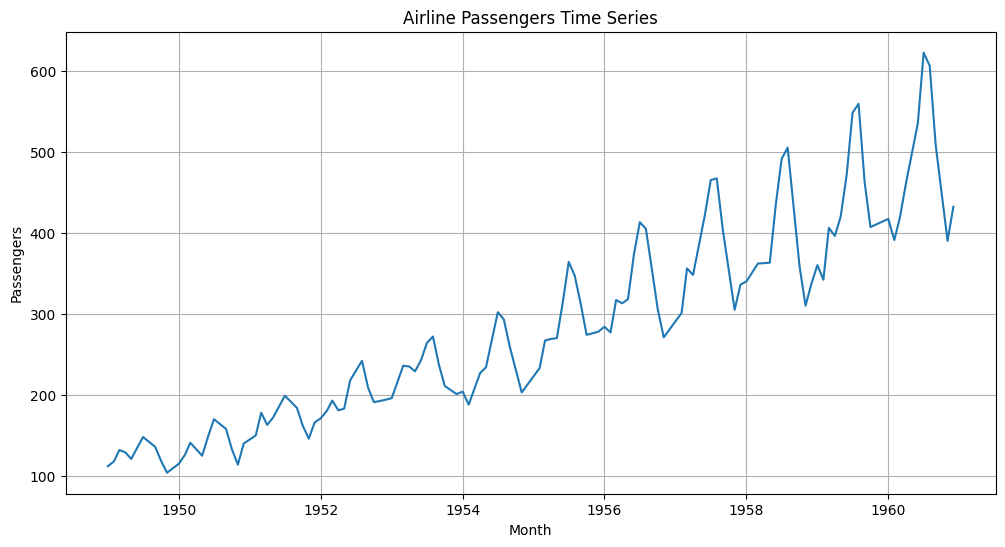

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'])
plt.title('Airline Passengers Time Series')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

In [ ]:
!pip install statsmodels==0.13.5 # Install the statsmodels library

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 41.1 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires statsmodels>=0.14.0, but you have statsmodels 0.13.5 which is incompatible.


In [ ]:
# (p, d, q) are the model orders
# Replace with the appropriate values for your data
model = ARIMA(df['Passengers'], order=(5, 1, 0))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model_fit = model.fit()

In [ ]:
# Define the number of steps (periods) to forecast ahead
steps = 12  # For example, predict the next 12 months

# Now you can make the predictions:
predictions = model_fit.predict(start=len(df), end=len(df) + steps - 1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


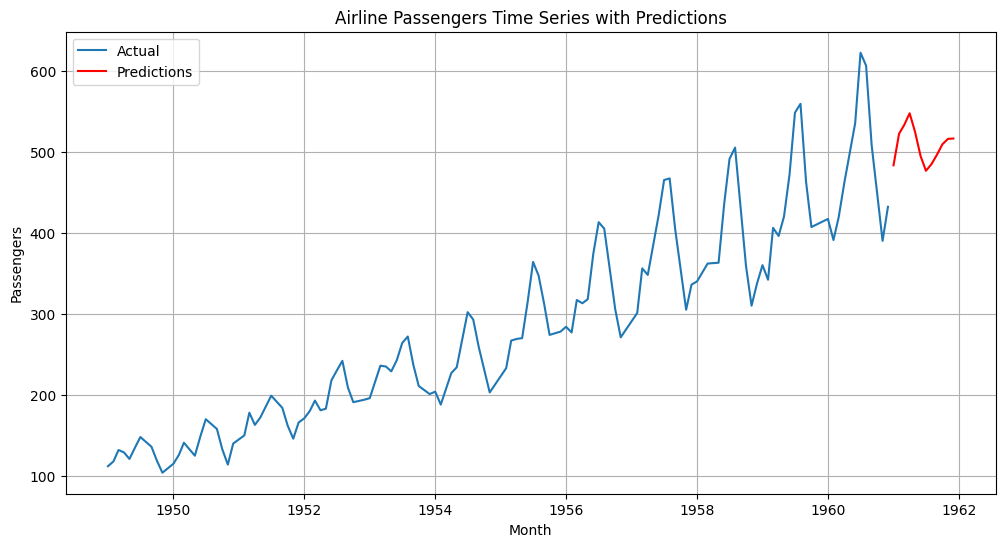

In [ ]:
import matplotlib.pyplot as plt

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Actual')

# Plot the predicted values
plt.plot(pd.date_range(start=df.index[-1], periods=steps + 1, freq='MS')[1:], predictions, label='Predictions', color='red')
# 'MS' frequency stands for Month Start

plt.title('Airline Passengers Time Series with Predictions')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

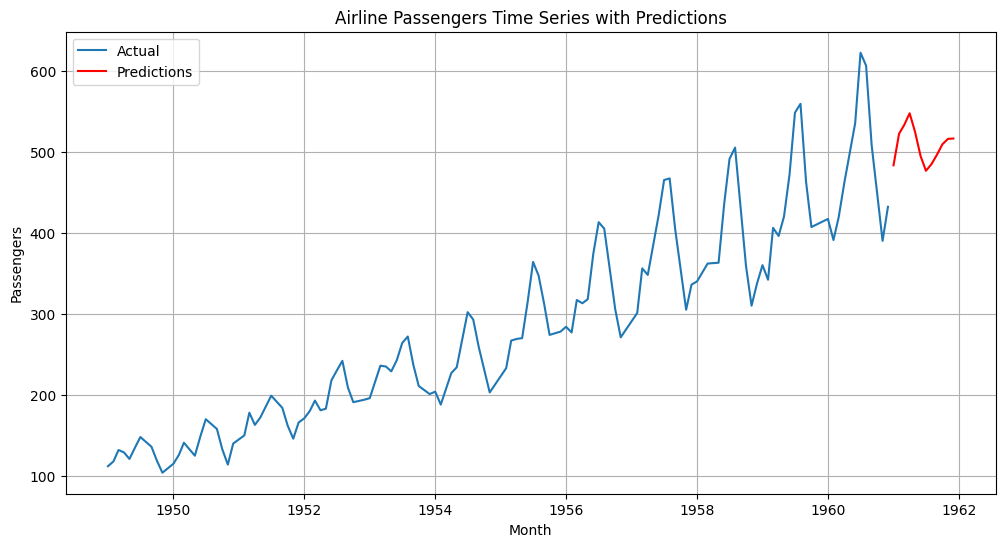

In [ ]:
import matplotlib.pyplot as plt

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Actual')

# Plot the predicted values
plt.plot(pd.date_range(start=df.index[-1], periods=steps + 1, freq='MS')[1:], predictions, label='Predictions', color='red')
# 'MS' frequency stands for Month Start

plt.title('Airline Passengers Time Series with Predictions')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

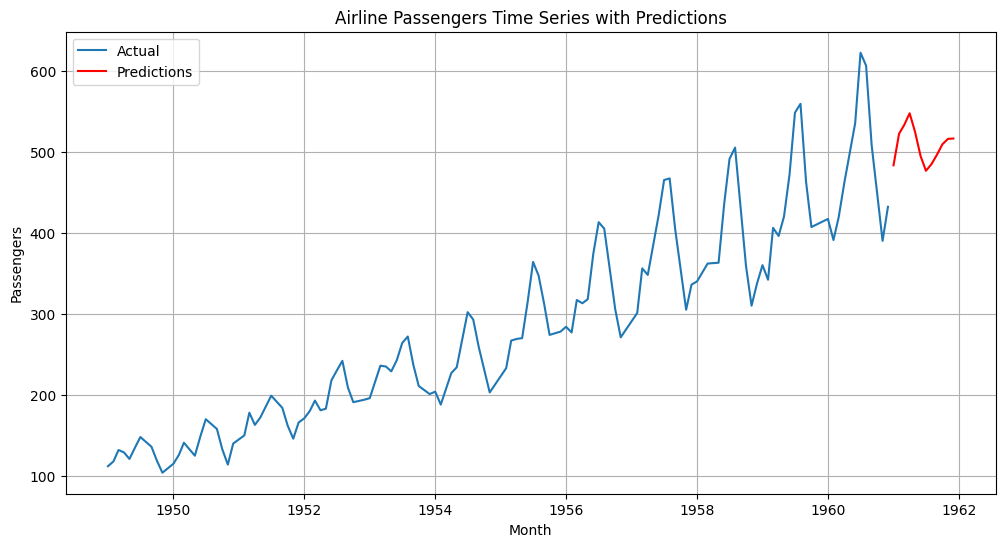

In [ ]:
import matplotlib.pyplot as plt

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Actual')

# Plot the predicted values
plt.plot(pd.date_range(start=df.index[-1], periods=steps + 1, freq='MS')[1:], predictions, label='Predictions', color='red')
# 'MS' frequency stands for Month Start

plt.title('Airline Passengers Time Series with Predictions')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()